# IMPORT DATASET

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, auc, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# LOADING THE CSV FILE (DATASET)

In [2]:
df= pd.read_csv('Heart_data.csv')
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# DATA PREPROCESSING: DATA CLEARNING AND FEATURE ENGINEERING

1. Remove id, and index column
2. Add BMI, Substance used and new age as the new feature
3. Only medically realistic range for blood pressure and ensuring range for blood pressure and enuring systolic >= diastolic

In [3]:
#Create BMI column
df = df.drop('index', axis=1)
df = df.drop(columns=['id'])
df['bmi'] = df['weight'] / (df['height']/100)**2
df['age'] = (df['age'] / 365).astype(int)
df['substance used'] = (df['alco'] + df['smoke'])

In [4]:
# Blood Pressure Cleaning

df = df[(df['ap_hi'] >= 80) & (df['ap_hi'] <= 250)]
df = df[(df['ap_lo'] >= 50) & (df['ap_lo'] <= 200)]

#Ensure systolic >= diastolic
df = df[df['ap_hi'] >= df['ap_lo']]

print("Remaining rows after blood pressure cleaning:", df.shape[0])

Remaining rows after blood pressure cleaning: 68652


In [5]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi', 'substance used'],
      dtype='object')

In [6]:
df.shape

(68652, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68652 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             68652 non-null  int32  
 1   gender          68652 non-null  int64  
 2   height          68652 non-null  int64  
 3   weight          68652 non-null  float64
 4   ap_hi           68652 non-null  int64  
 5   ap_lo           68652 non-null  int64  
 6   cholesterol     68652 non-null  int64  
 7   gluc            68652 non-null  int64  
 8   smoke           68652 non-null  int64  
 9   alco            68652 non-null  int64  
 10  active          68652 non-null  int64  
 11  cardio          68652 non-null  int64  
 12  bmi             68652 non-null  float64
 13  substance used  68652 non-null  int64  
dtypes: float64(2), int32(1), int64(11)
memory usage: 7.6 MB


In [8]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,substance used
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,0
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,0
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


In [9]:
df.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,substance used
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,1
69996,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,0
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,0
69999,56,1,170,72.0,120,80,2,1,0,0,1,0,24.913495,0


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,68652.0,52.829371,6.768919,29.000000,48.000000,53.000000,58.000000,64.000000
gender,68652.0,1.348686,0.476558,1.000000,1.000000,1.000000,2.000000,2.000000
height,68652.0,164.362830,8.183262,55.000000,159.000000,165.000000,170.000000,250.000000
weight,68652.0,74.121230,14.331623,11.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,68652.0,126.677198,16.686610,80.000000,120.000000,120.000000,140.000000,240.000000
ap_lo,68652.0,81.320457,9.430504,50.000000,80.000000,80.000000,90.000000,182.000000
cholesterol,68652.0,1.364651,0.678897,1.000000,1.000000,1.000000,2.000000,3.000000
gluc,68652.0,1.225689,0.571563,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,68652.0,0.087965,0.283247,0.000000,0.000000,0.000000,0.000000,1.000000
alco,68652.0,0.053341,0.224715,0.000000,0.000000,0.000000,0.000000,1.000000


# EXPLORATORY DATA ANALYSIS (EDA)

1. Target Distibution
2. Demographics (Age, Gender)
3. Anthropometrics (Height, Weight, BMI)
4. Medical Indicators (Blood Pressure, Cholesterol, Glucose)
5. Lifestyle Factors (Smoke, Alcohol, Activity)
6. Correlation
7. Feature Importance

#1. Target Variable Distribution

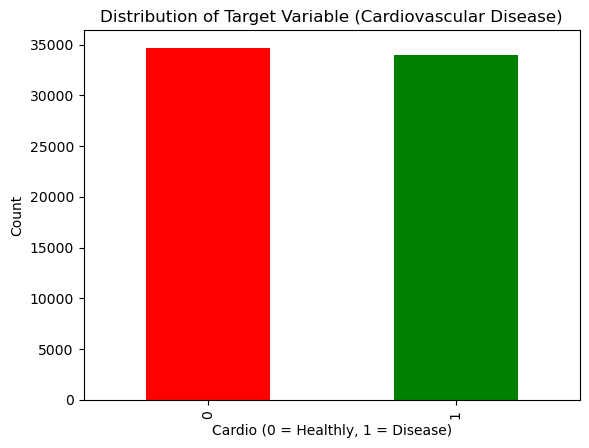

In [11]:
# Countplot of target variable
df['cardio'].value_counts().plot(kind='bar', color=['red','green'])
plt.title('Distribution of Target Variable (Cardiovascular Disease)')
plt.xlabel('Cardio (0 = Healthly, 1 = Disease)')
plt.ylabel('Count')
plt.show()

#2. Demographics (Age, Gender)


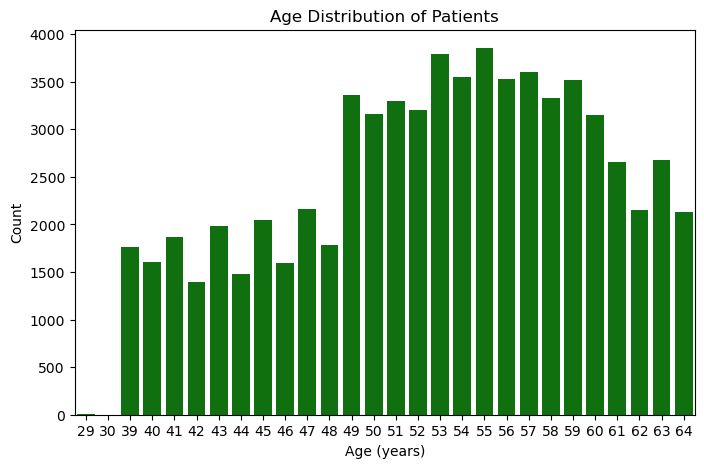

In [12]:
#A: Age Distribution
# Plot age distribution
plt.figure(figsize=(8,5))
sns.countplot(x ='age', data=df, color='Green')
plt.title('Age Distribution of Patients')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

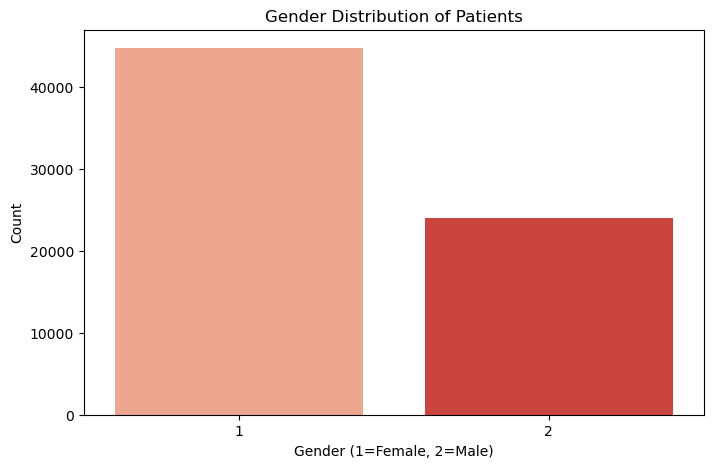

In [13]:
#B: Gender

# Plot age distribution
plt.figure(figsize=(8,5))
sns.countplot(x ='gender', data=df, palette='Reds')
plt.title('Gender Distribution of Patients')
plt.xlabel('Gender (1=Female, 2=Male)')
plt.ylabel('Count')
plt.show()

#3. Anthropometrics (Height, Weight, BMI)

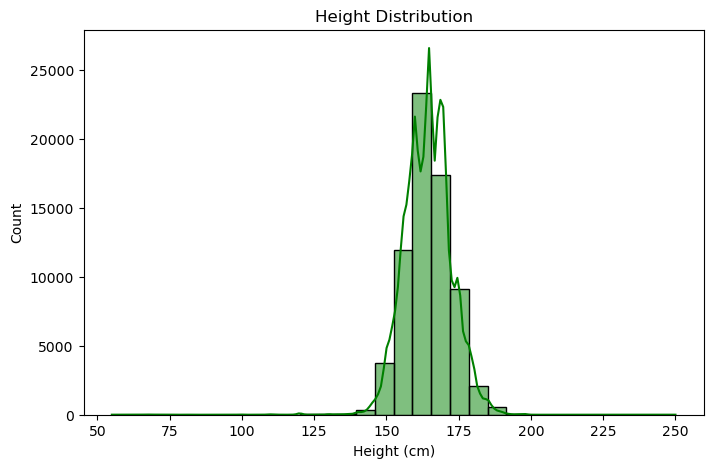

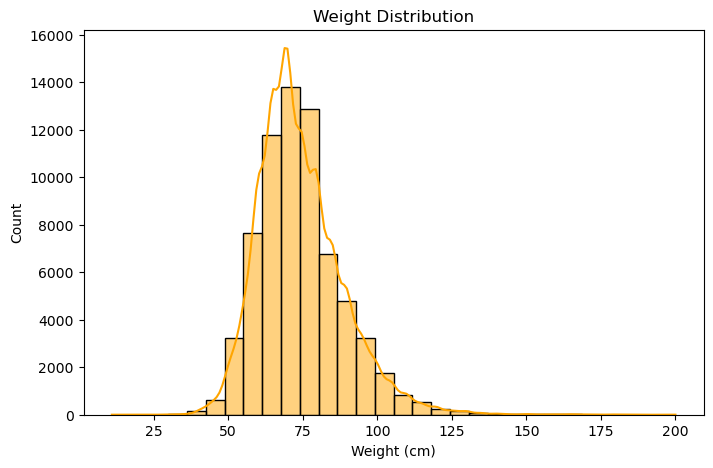

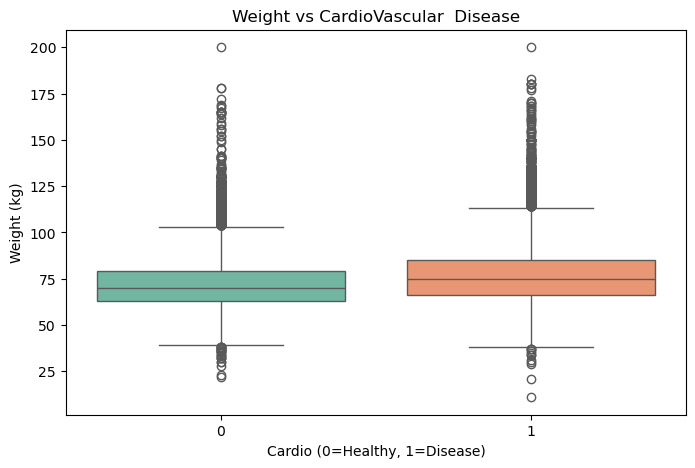

In [14]:
#Height Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['height'], bins=30, kde=True, color='green')
plt.title("Height Distribution")
plt.xlabel("Height (cm)")
plt.ylabel("Count")
plt.show()

#Weight Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['weight'], bins=30, kde=True, color='orange')
plt.title("Weight Distribution")
plt.xlabel("Weight (cm)")
plt.ylabel("Count")
plt.show()

#Compare Weight vs Cardio
plt.figure(figsize=(8,5))
sns.boxplot(x='cardio', y="weight", data=df, palette='Set2')
plt.title("Weight vs CardioVascular  Disease")
plt.xlabel("Cardio (0=Healthy, 1=Disease)")
plt.ylabel("Weight (kg)")
plt.show()

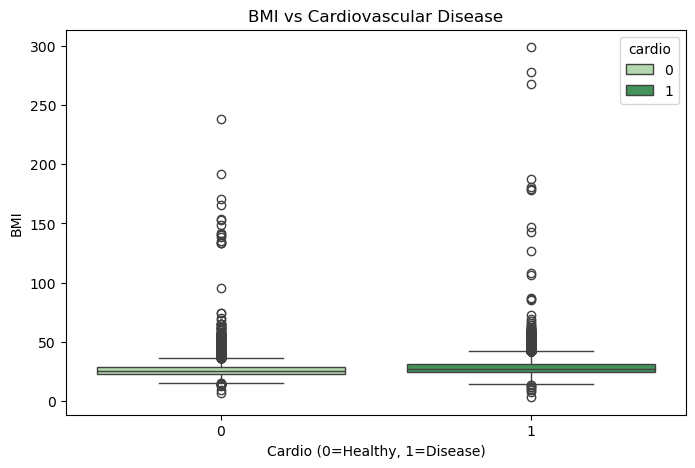

In [15]:
# Compare BMI by disease status
plt.figure(figsize=(8,5))
sns.boxplot(data= df, x='cardio', y='bmi', hue='cardio', palette='Greens')
plt.title("BMI vs Cardiovascular Disease")
plt.xlabel("Cardio (0=Healthy, 1=Disease)")
plt.ylabel("BMI")
plt.show()

#4. Medical Indicators (Blood Pressure, Cholesterol, Glucose)

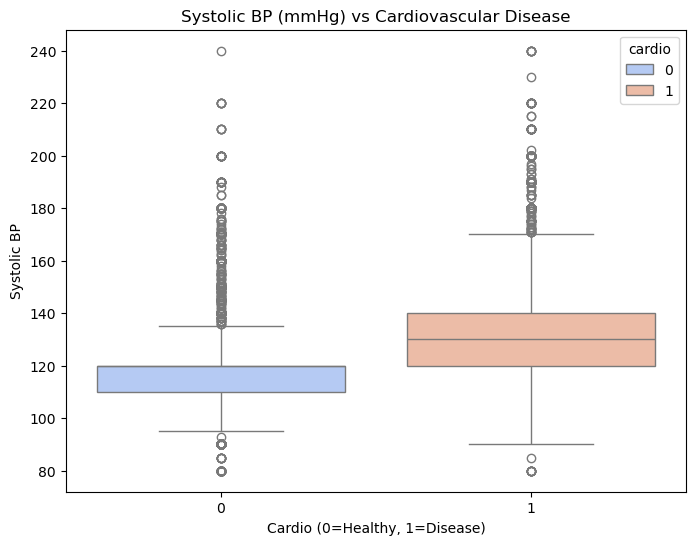

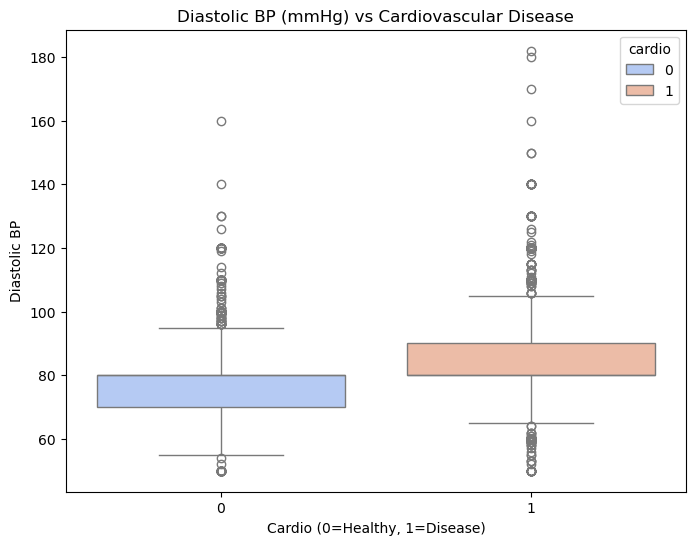

In [16]:
# Compared Blood Pressure by Disease
plt.figure(figsize=(8,6))
sns.boxplot(data= df, x='cardio', y='ap_hi', hue='cardio', palette='coolwarm')
plt.title("Systolic BP (mmHg) vs Cardiovascular Disease")
plt.xlabel("Cardio (0=Healthy, 1=Disease)")
plt.ylabel("Systolic BP")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(data= df, x='cardio', y='ap_lo', hue='cardio', palette='coolwarm')
plt.title("Diastolic BP (mmHg) vs Cardiovascular Disease")
plt.xlabel("Cardio (0=Healthy, 1=Disease)")
plt.ylabel("Diastolic BP")
plt.show()

#5. Lifestyle Factors (Smoke, Alcohol, Activity)

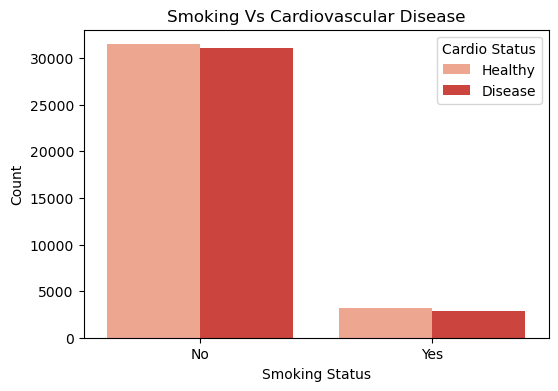

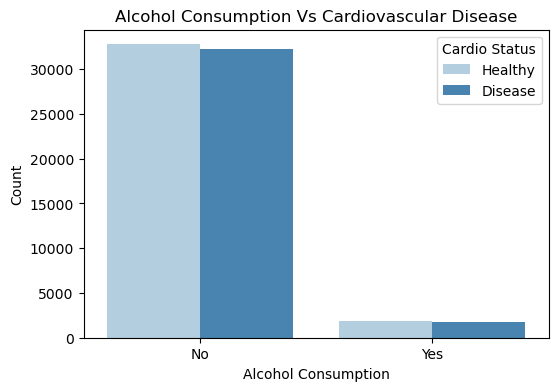

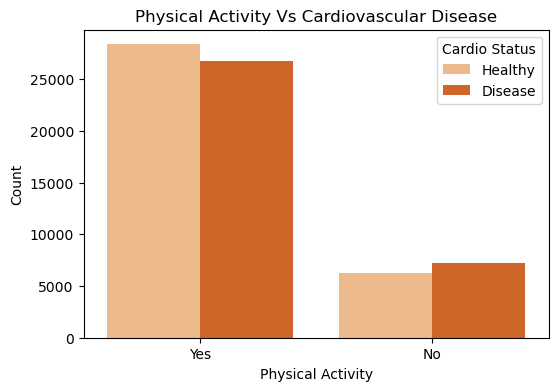

In [17]:
#Smoking vs Disease
#Create a temporary dataframe for plotting
df_plot = df.copy()
df_plot['smoke'] = df_plot['smoke'].map({0: "No", 1: "Yes"})
df_plot['cardio'] = df_plot['cardio'].map({0: "Healthy", 1: "Disease"})

#Smoking vs Disease
plt.figure(figsize=(6,4))
sns.countplot(x='smoke', hue='cardio', data=df_plot, palette='Reds')
plt.title("Smoking Vs Cardiovascular Disease")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.legend(title="Cardio Status")
plt.show()


#Alcohol vs Disease
#Create a temporary dataframe for plotting
df_plot = df.copy()
df_plot['alco'] = df_plot['alco'].map({0: "No", 1: "Yes"})
df_plot['cardio'] = df_plot['cardio'].map({0: "Healthy", 1: "Disease"})

#Alcohol vs Disease
plt.figure(figsize=(6,4))
sns.countplot(x='alco', hue='cardio', data=df_plot, palette='Blues')
plt.title("Alcohol Consumption Vs Cardiovascular Disease")
plt.xlabel("Alcohol Consumption")
plt.ylabel("Count")
plt.legend(title="Cardio Status")
plt.show()


#Physical Activity vs Disease
df_plot['active'] = df_plot['active'].map({0: "No", 1: "Yes"})

#Physical Activity vs Disease
plt.figure(figsize=(6,4))
sns.countplot(x='active', hue='cardio', data=df_plot, palette='Oranges')
plt.title("Physical Activity Vs Cardiovascular Disease")
plt.xlabel("Physical Activity")
plt.ylabel("Count")
plt.legend(title="Cardio Status")
plt.show()

#6. Correlation

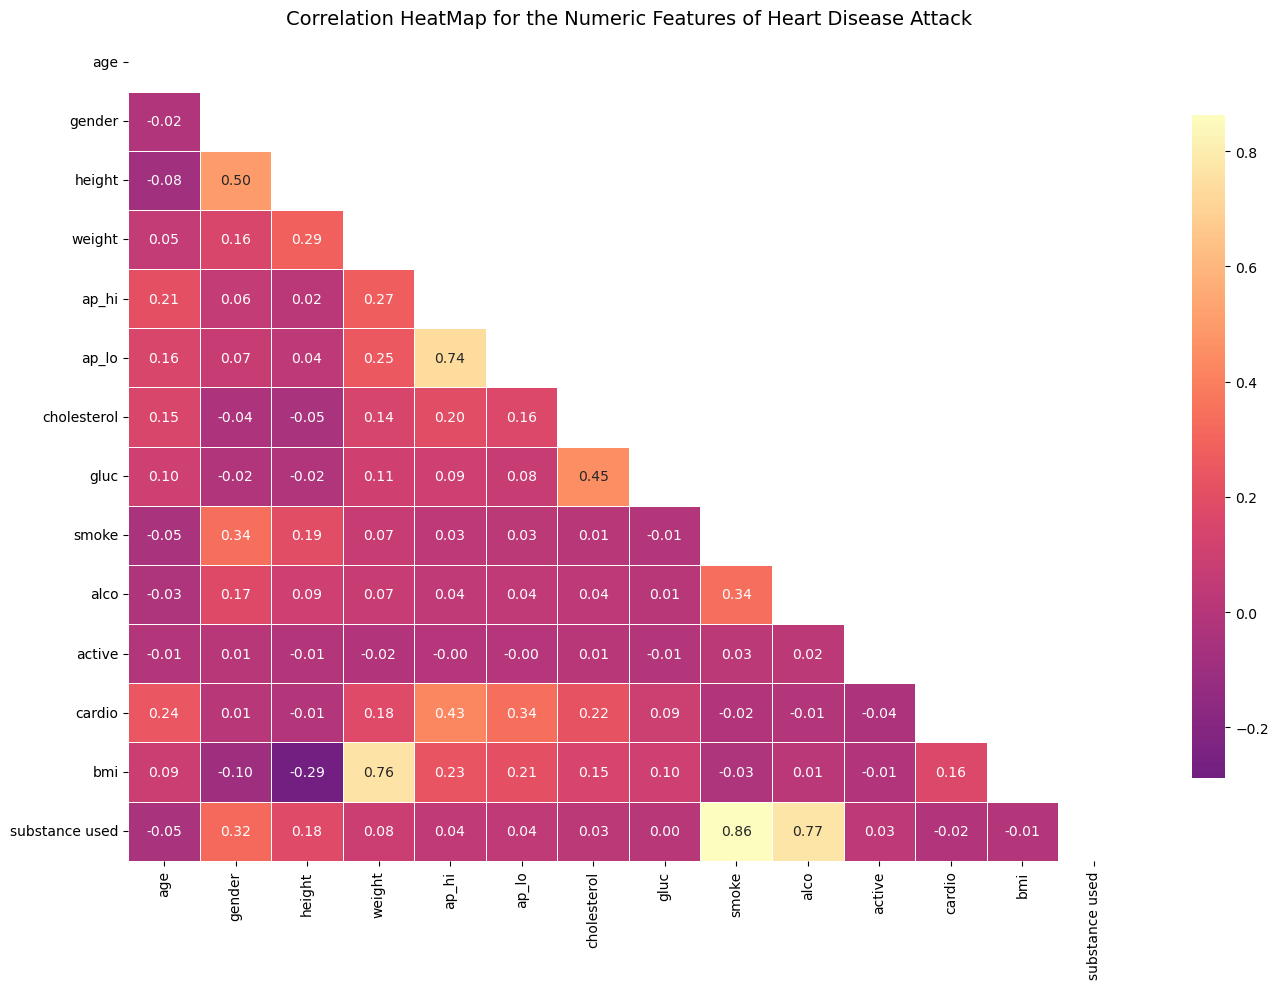

Correlation of Features with Target (cardio):

cardio            1.000000
ap_hi             0.427838
ap_lo             0.341166
age               0.239069
cholesterol       0.221410
weight            0.179623
bmi               0.164265
gluc              0.089658
gender            0.007127
alco             -0.008639
height           -0.010773
substance used   -0.015656
smoke            -0.016207
active           -0.037558
Name: cardio, dtype: float64


In [18]:
# ---  Correlation Heatmap -
plt.figure(figsize=(14,10))
 # Select only numeric columns for correlation
corr = df.select_dtypes(include=['number']).corr()
 # Focus on stronger correlations only
mask = np.triu(np.ones_like(corr, dtype=bool))  # mask upper triangle
sns.heatmap(
    corr, 
    mask=mask, 
    cmap="magma", 
    center=0, 
    annot=True,
    fmt=".2f", 
    linewidths= 0.5,
    cbar_kws={"shrink": 0.8}
    )
plt.title("Correlation HeatMap for the Numeric Features of Heart Disease Attack", fontsize=14)
plt.tight_layout()
plt.show()

#Show correlation of features with target 'cardio'
target_corr = corr['cardio'].sort_values(ascending=False)
print("Correlation of Features with Target (cardio):\n")
print(target_corr)

#7. Feature Importance

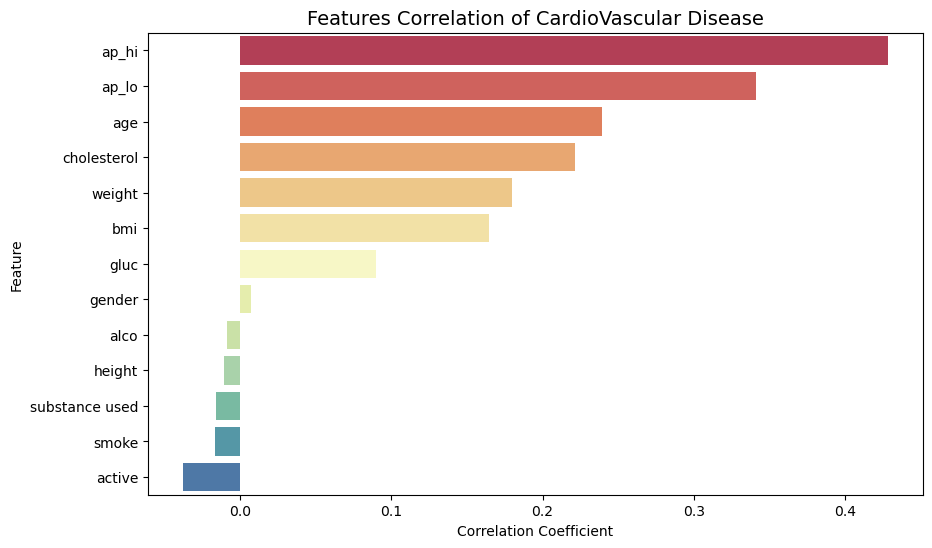

In [19]:
#Sorted Correlated with target
numeric_df = df.select_dtypes(include=['number'])
target_corr = (numeric_df.corr()["cardio"]
   .drop('cardio')
   .sort_values(ascending=False)
   )
# --- Visualize correlation strength --
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr, y=target_corr.index, palette='Spectral')
plt.title("Features Correlation of CardioVascular Disease", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel('Feature')
plt.show()

# SPLITTING THE DATASET INTO TRAINING AND TESTING DATASET

In [20]:
#Seperate features (X) and target (y)

X = df.drop(columns='cardio')
y = df['cardio']

#Splitting the dataset into training (80%) and testing (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

# IMPORTING MODEL

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB

In [22]:
lr = LogisticRegression(max_iter=500)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
knn = KNeighborsClassifier()
gnb = GaussianNB()


models = {'Logistic Regression': lr, 'Decision Tree':dt, 'Random Forest': rf, "XGBoost": xgb, "KNeighborsClassifier": knn,
         'Naive-Bayes': gnb}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained.')

Logistic Regression trained.
Decision Tree trained.
Random Forest trained.
XGBoost trained.
KNeighborsClassifier trained.
Naive-Bayes trained.


# Model Evaluation Use Metrics: Accuracy, Precision, Recall, F1_Score and AUC_ROC

In [23]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{name}:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
    print(f'Precision: {precision_score(y_test, y_pred):.3f}')
    print(f'Recall: {recall_score(y_test, y_pred):.3f}')
    print(f'F1 Score: {f1_score(y_test, y_pred):.3f}')
    print(f'AUC-ROC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.3f}\n')

Logistic Regression:
Accuracy: 0.724
Precision: 0.748
Recall: 0.668
F1 Score: 0.706
AUC-ROC: 0.785

Decision Tree:
Accuracy: 0.635
Precision: 0.634
Recall: 0.621
F1 Score: 0.628
AUC-ROC: 0.637

Random Forest:
Accuracy: 0.703
Precision: 0.704
Recall: 0.689
F1 Score: 0.696
AUC-ROC: 0.763

XGBoost:
Accuracy: 0.731
Precision: 0.748
Recall: 0.688
F1 Score: 0.717
AUC-ROC: 0.793

KNeighborsClassifier:
Accuracy: 0.688
Precision: 0.691
Recall: 0.668
F1 Score: 0.679
AUC-ROC: 0.735

Naive-Bayes:
Accuracy: 0.707
Precision: 0.753
Recall: 0.606
F1 Score: 0.671
AUC-ROC: 0.772



# CONFUSION MATRIX

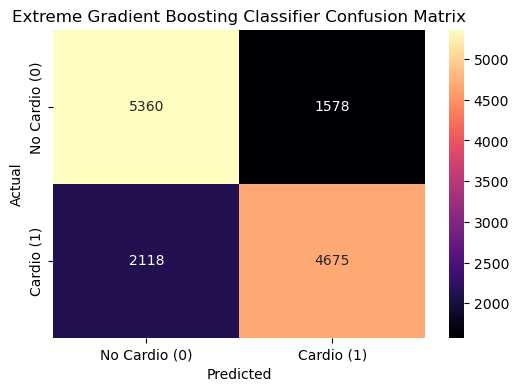

In [24]:
model_xgb = xgb

#Confusion Matrix
y_pred_xgb = model_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=['No Cardio (0)', 'Cardio (1)'],
            yticklabels=['No Cardio (0)', 'Cardio (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Extreme Gradient Boosting Classifier Confusion Matrix')
plt.show()
            

1. True Positives (4675): These are individuals who were correctly identified as having cardiovascular disease. The organization can take appropriate steps like offering medical attention, lifestyle interventions, or further screening.
   
2. False Positives (1578): These individuals were incorrectly flagged as having the condition when they are actually healthy. This could lead to unnecessary follow-ups or concern but ensures caution.
   
3. False Negative(2118): These individuals actually have the condition, but the model failed to detect it. This is the most concerning group, as they may go untreated. Reducing this number is essential to prevent serious health outcomes.
   
4. True Negative (5360): These are healthy individuals correctly identified as such. No action is needed, helping focus resources where they are truly needed.

# APPLY STREAMLIT

In [25]:
import joblib
#save the trained model
joblib.dump(lr, 'best_model_lr.pkl')
print('Logistic Regression model saved as best_model_lr.pkl')

Logistic Regression model saved as best_model_lr.pkl


In [26]:
import joblib
#save the trained model
joblib.dump(xgb, 'best_model_xgb.pkl')
print('Extreme Gradient Boosting Classifier model saved as best_model_xgb.pkl')

Extreme Gradient Boosting Classifier model saved as best_model_xgb.pkl
